In [1]:
%load_ext autoreload 
%autoreload 2 

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from src.utilities.pandas_helpers import filter_columns_by_search, flatten_dataframe
from src.data_processing.pipelines.ClassifierPipe import ClassifierPipe


In [4]:
DATA_PATH = "/Users/mds8301/iterm_data_storage/raw_data_raw_data.parquet.gzip"
pipe = (ClassifierPipe(DATA_PATH)
        .read_raw_data()
        .calculate_max_min_signal()
)
df = pipe.processed_data.dropna()
df

,mouse_id,event,action,sensor,sex,day,trial_count,trial,signal_max,signal_min,signal_trapz,pos_signal_trapz
0,0,avoid,avoid,D1,F,1,1,1,3.127942,0.191952,116.531731,116.531731
1,0,avoid,avoid,D1,F,3,58,0,0.919383,-0.615567,13.555368,20.972948
2,0,avoid,avoid,D1,F,3,59,1,-0.394839,-2.368783,-177.065491,0.000000
3,0,avoid,avoid,D1,F,3,66,8,0.367330,-1.989866,-105.136833,0.739878
4,0,avoid,avoid,D1,F,3,67,9,3.867368,1.411265,241.010254,241.010254
...,...,...,...,...,...,...,...,...,...,...,...,...
12789,13,shock,escape,DA,M,3,74,16,2.978387,-1.480360,0.550437,43.106064
12790,13,shock,escape,DA,M,4,87,0,1.694918,-2.158833,-42.946926,22.659679
12791,13,shock,escape,DA,M,5,114,0,3.849639,-1.624187,117.117256,128.465363
12792,13,shock,escape,DA,M,6,143,0,4.559294,-1.507916,85.235641,102.735771


/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


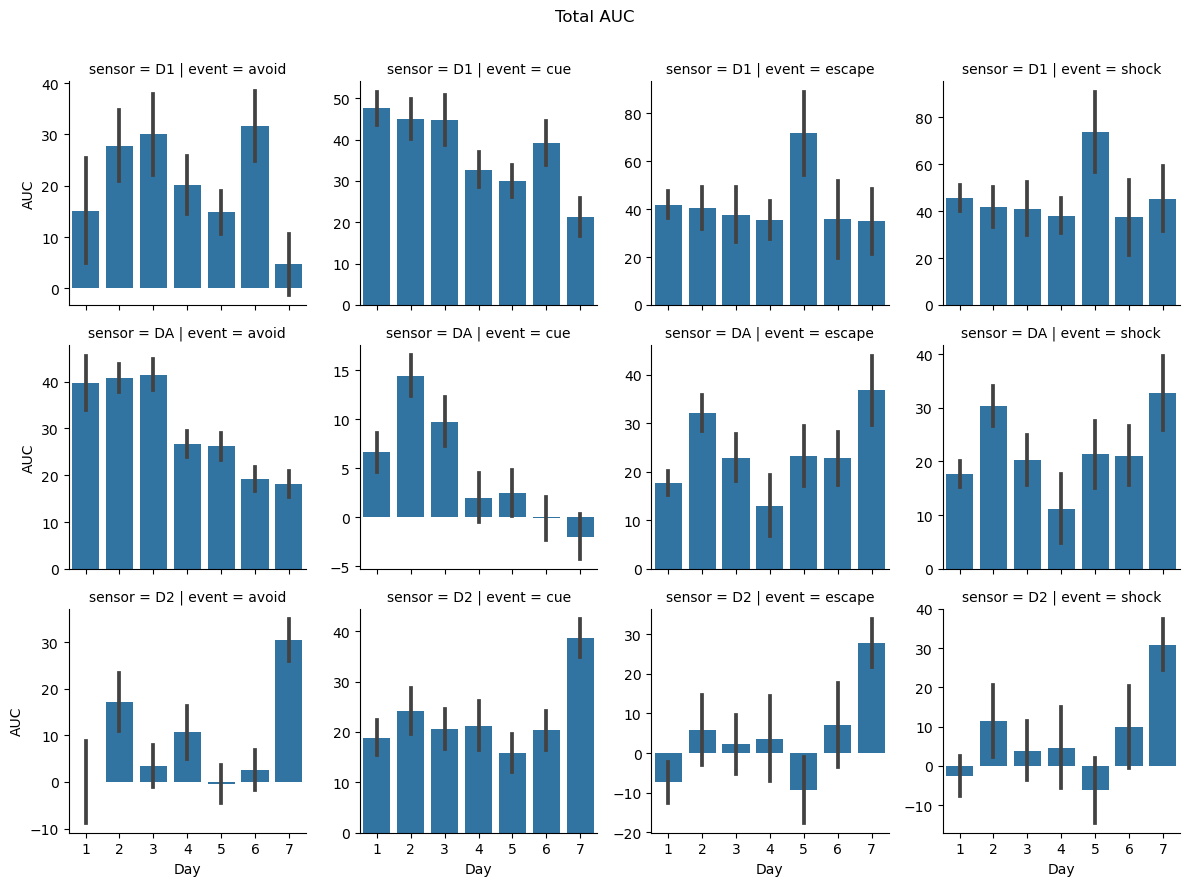

In [88]:
def plot_auc_by_day(column, title):
    grid = sns.FacetGrid(df, col = "event", row = "sensor", sharey=False)
    grid.map(sns.barplot, "day", column, errorbar = 'se')
    grid.set_axis_labels("Day", "AUC")
    grid.fig.suptitle(title)
    grid.fig.subplots_adjust(top=0.9)
    plt.show()
plot_auc_by_day("signal_trapz", "Total AUC")

/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


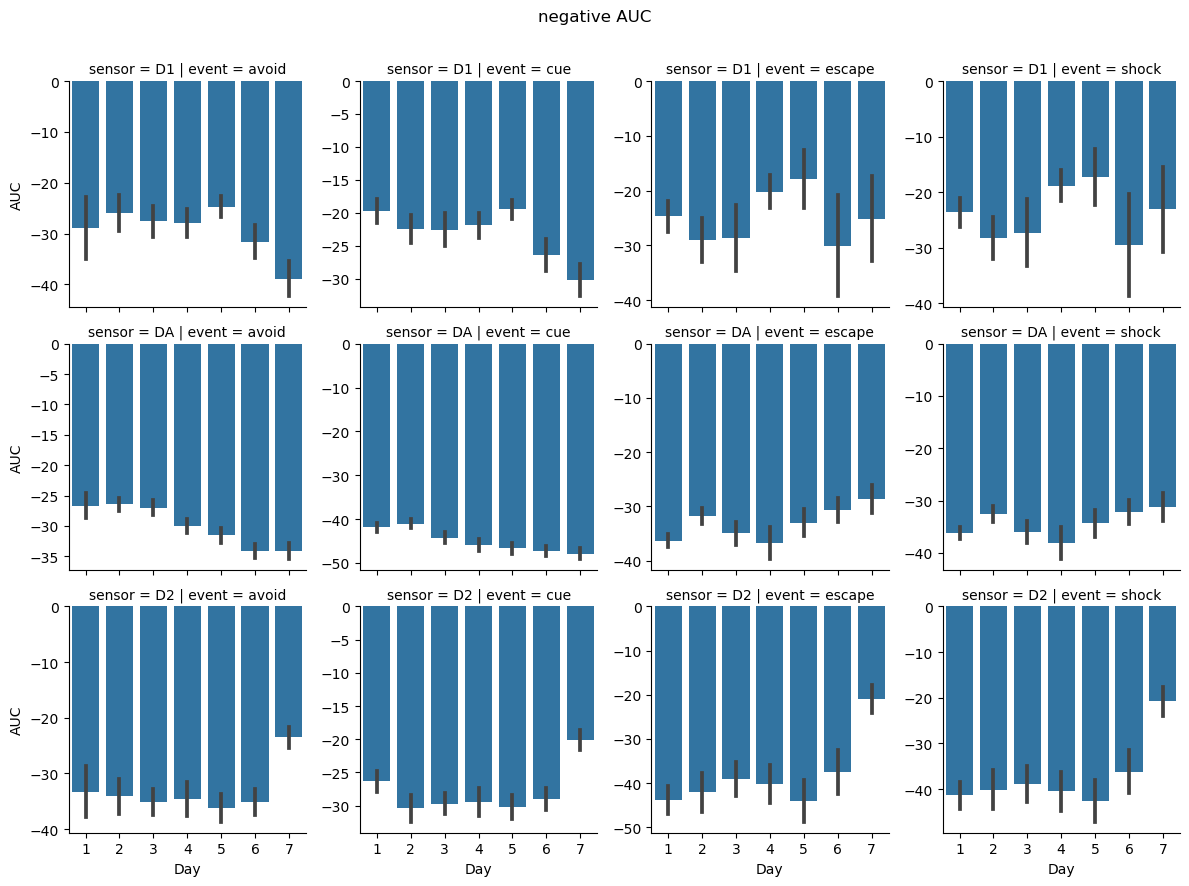

In [89]:
plot_auc_by_day("neg_signal_trapz", "negative AUC")

/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


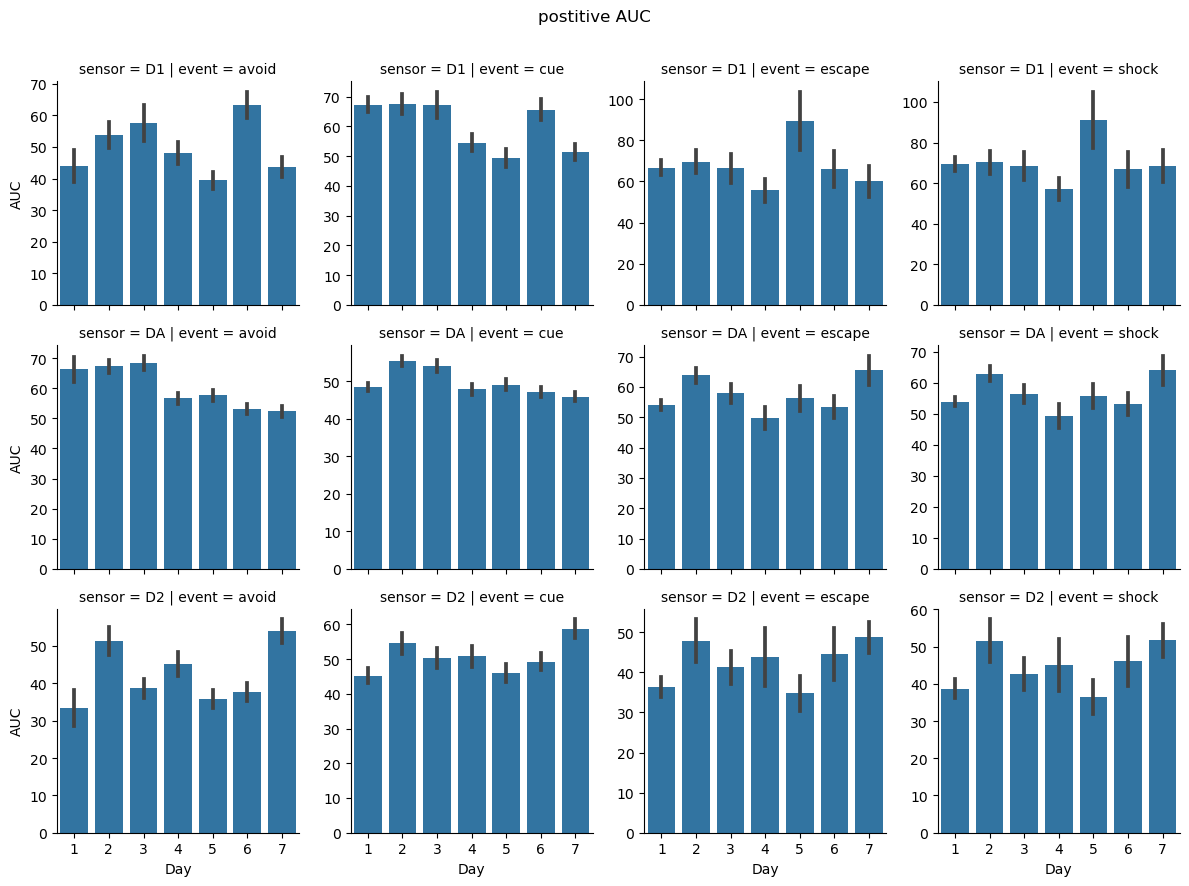

In [90]:
plot_auc_by_day("pos_signal_trapz", "postitive AUC")

In [22]:
import scipy
single_trial = pipe.raw_data.query("mouse_id==1 & event == 'cue' & day==1 & sensor=='DA'& trial==1")
single_trial

,mouse_id,day,event,sensor,time,trial,signal,action,latency,sex,learning_phase,trial_count
2966924,1,1,cue,DA,-25.000000,1,-0.318677,escape,0.0,F,0,1
2966925,1,1,cue,DA,-24.901531,1,0.306801,escape,0.0,F,0,1
2966926,1,1,cue,DA,-24.803064,1,0.528459,escape,0.0,F,0,1
2966927,1,1,cue,DA,-24.704596,1,0.144759,escape,0.0,F,0,1
2966928,1,1,cue,DA,-24.606127,1,-0.451382,escape,0.0,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2967377,1,1,cue,DA,19.606127,1,-0.212110,escape,0.0,F,0,1
2967378,1,1,cue,DA,19.704596,1,-0.315351,escape,0.0,F,0,1
2967379,1,1,cue,DA,19.803064,1,-0.602060,escape,0.0,F,0,1
2967380,1,1,cue,DA,19.901531,1,1.288783,escape,0.0,F,0,1


In [102]:
single_trial.time

2966924   -25.000000
2966925   -24.901531
2966926   -24.803064
2966927   -24.704596
2966928   -24.606127
             ...    
2967377    19.606127
2967378    19.704596
2967379    19.803064
2967380    19.901531
2967381    20.000000
Name: time, Length: 458, dtype: float32

/var/folders/_3/4x4mtlsd3n37vfrcjmsz1vcd8clmkl/T/ipykernel_32224/1291685360.py:14: RankWarning: Polyfit may be poorly conditioned
  time, fitted = fit_signal(signal.signal)


,mouse_id,day,event,sensor,time,trial,signal,action,latency,sex,learning_phase,trial_count
1860854,1,7,cue,DA,-25.000000,25,-1.097169,avoid,0.0,F,2,197
1860855,1,7,cue,DA,-24.901531,25,-1.282019,avoid,0.0,F,2,197
1860856,1,7,cue,DA,-24.803064,25,-0.726373,avoid,0.0,F,2,197
1860857,1,7,cue,DA,-24.704596,25,-0.266345,avoid,0.0,F,2,197
1860858,1,7,cue,DA,-24.606127,25,-0.064709,avoid,0.0,F,2,197
...,...,...,...,...,...,...,...,...,...,...,...,...
1861307,1,7,cue,DA,19.606127,25,1.491594,avoid,0.0,F,2,197
1861308,1,7,cue,DA,19.704596,25,1.747952,avoid,0.0,F,2,197
1861309,1,7,cue,DA,19.803064,25,0.457428,avoid,0.0,F,2,197
1861310,1,7,cue,DA,19.901531,25,-0.901571,avoid,0.0,F,2,197


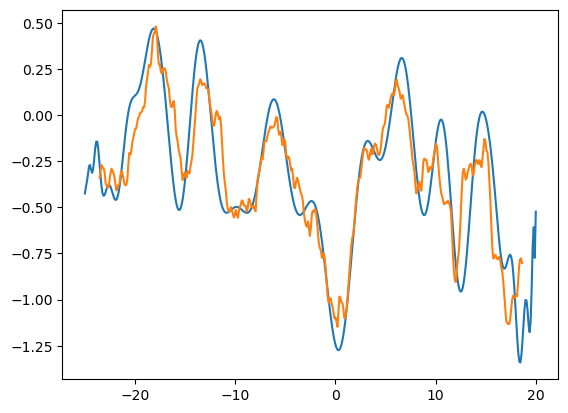

In [191]:


signal = pipe.raw_data.query("mouse_id==1 & event == 'cue' & day==7 & sensor=='DA'& trial==25")


def fit_signal(signal):
    signal = signal.rolling(20, center=True).mean().dropna()
    time = np.linspace(-25, 20, len(signal))
    fit_poly = np.polyfit(time, signal, deg = 100)
    fit_line = np.poly1d(fit_poly)
    pred = fit_line(time)
    pred = np.pad(pred, (0, len(time) - len(pred)), 'constant', constant_values=0)
    time = np.pad(time, (0, len(pred) - len(time)), 'constant', constant_values=0)
    return time, pred

time, fitted = fit_signal(signal.signal)
plt.plot(time, fitted)
roll_sig = signal.signal.rolling(30, center=True).mean()
plt.plot(np.linspace(-25, 20, len(roll_sig)), roll_sig)
signal

In [95]:
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y = 0.5 * x**2 - 2 * x + 1 + np.random.normal(scale=0.1, size=len(x))

# Fit a polynomial of degree 2 to the data
p = np.polyfit(x, y, 10)

# Print the coefficients of the polynomial
print("The coefficients of the polynomial are:", p)

The coefficients of the polynomial are: [-8.47119584e-07  4.39313828e-05 -9.71415843e-04  1.19515638e-02
 -8.95752062e-02  4.21329539e-01 -1.23819358e+00  2.19924865e+00
 -1.69274583e+00 -9.79416741e-01  8.73846158e-01]


In [207]:
data = pipe.raw_data.groupby(by = ['mouse_id', 'day', 'event', 'sensor', 'action', 'sex', 'learning_phase', 'time'], as_index=False).agg({"signal":['mean']})
data = (data
        .pipe(flatten_dataframe).rename(columns=lambda c: c.strip("_"))
        .drop(columns='index')
)
data

,mouse_id,day,event,sensor,action,sex,learning_phase,time,signal_mean
0,0,1,avoid,D1,avoid,F,0,-25.000000,0.145588
1,0,1,avoid,D1,avoid,F,0,-24.901531,0.740007
2,0,1,avoid,D1,avoid,F,0,-24.803064,0.809107
3,0,1,avoid,D1,avoid,F,0,-24.704596,1.052871
4,0,1,avoid,D1,avoid,F,0,-24.606127,1.703075
...,...,...,...,...,...,...,...,...,...
1252167,13,7,shock,DA,avoid,M,0,19.606127,1.550692
1252168,13,7,shock,DA,avoid,M,0,19.704596,1.524243
1252169,13,7,shock,DA,avoid,M,0,19.803064,1.735290
1252170,13,7,shock,DA,avoid,M,0,19.901531,1.498784


In [210]:
g = sns.FacetGrid(data, col = "event", row = "day", hue='sensor', sharey=False)
g.map(sns.lineplot, "time", "signal_mean")